In [17]:
import pandas as pd

In [73]:
train_data = pd.read_csv('train_vidya3.csv')

In [19]:
test_data = pd.read_csv('test_vidya3.csv')

In [216]:
train_data.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
64052,APPR50149904119,Male,83,924,C10001,A,COM0000088,A,1.0,4000.0,...,Y,S122,G,0.0,72000.0,4.0,13.99,1967.0,7,0
34080,APPE90308784248,Female,90,818,C10103,C,COM0040325,A,4.0,1350.0,...,N,S133,B,320.0,NaN,NaN,NaN,NaN,0,0
13632,APPD60934413918,Female,81,720,C10005,A,COM0005876,A,4.0,1889.2,...,Y,S143,B,370.0,10000.0,3.0,20.00,372.0,2,0
11431,APPZ40854273339,Female,94,717,C10002,A,COM0000052,B,2.0,1700.0,...,N,S133,C,0.0,NaN,NaN,NaN,NaN,0,0
43825,APPK80127089231,Female,80,831,C10003,A,COM0001598,C,4.0,2100.0,...,N,S122,G,1200.0,NaN,NaN,NaN,NaN,0,0


In [49]:
train_data['DOB'] = train_data['DOB'].apply(lambda x: int(str(x)[-2:]))

ValueError: invalid literal for int() with base 10: 'an'

In [13]:
#test_data['Lead_Creation_Date'].value_counts()

16    30037
Name: Lead_Creation_Date, dtype: int64

In [132]:
train_data.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,79,715,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,86,704,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,82,719,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,89,709,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,85,720,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [221]:
sum(pd.isna(train_data["EMI"])==True)
#train_data['Primary_Bank_Type'].value_counts()

47437

In [ ]:
corr_matrix = train_data.corr()

In [ ]:
corr_matrix["Approved"].sort_values()

In [82]:
train_data['Lead_Creation_Date'] = train_data['Lead_Creation_Date'].apply(lambda x: int(str(x)[3:5]))*100+train_data['Lead_Creation_Date'].apply(lambda x: int(str(x)[:2]))

In [120]:
mode = train_data["Customer_Existing_Primary_Bank_Code"].mode()
train_data["Customer_Existing_Primary_Bank_Code"].fillna(mode[0],inplace = True)

In [74]:
mode[0]

'11/01/82'

In [75]:
train_data["DOB"].where(pd.isnull(train_data["DOB"])==False,mode[0],inplace=True)

In [92]:
from pandas.tools.plotting import scatter_matrix

/home/shruti/analytics_vidya_competitions/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


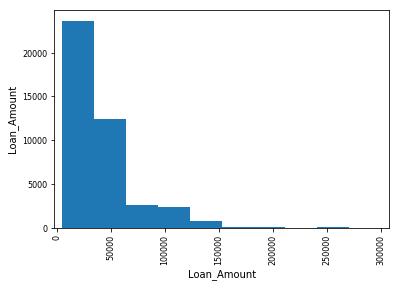

In [218]:
scatter_matrix(train_data[["Loan_Amount"]])
import matplotlib.pyplot as plt

In [121]:
train_data['Customer_Existing_Primary_Bank_Code'] = train_data['Customer_Existing_Primary_Bank_Code'].apply(lambda x: int(str(x)[-3:]))

In [157]:
train_data['Primary_Bank_Type'].value_counts()

P    49010
G    20703
Name: Primary_Bank_Type, dtype: int64

In [128]:
train_data["Source_Category"].where(train_data["Source_Category"]!='D','E',inplace=True)

In [129]:
train_data["Source_Category"].where(train_data["Source_Category"]!='F','E',inplace=True)
train_data["Source_Category"].where(train_data["Source_Category"]!='A','E',inplace=True)

In [133]:
from sklearn.base import TransformerMixin,BaseEstimator
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [134]:
num_attribs = ["DOB","Lead_Creation_Date","Employer_Category2","Monthly_Income","Existing_EMI","Var1","Customer_Existing_Primary_Bank_Code"]

In [135]:
cat_attribs = ["Gender","City_Category","Employer_Category1","Contacted","Source_Category","Primary_Bank_Type"]

In [136]:
from sklearn.preprocessing import LabelBinarizer
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = self.encoder.fit_transform(X)
        else:
            result = self.encoder.transform(X)
        return result; 

In [137]:
from sklearn.pipeline import Pipeline

In [138]:
num_pipeline = Pipeline([("selector",DataFrameSelector(num_attribs))])

In [141]:
cat_pipeline1 = Pipeline([("selector",DataFrameSelector("Gender")),("label_binarizer",LabelBinarizer_new())])

In [143]:
cat_pipeline2 = Pipeline([("selector",DataFrameSelector("City_Category")),("label_binarizer",LabelBinarizer_new())])
cat_pipeline3 = Pipeline([("selector",DataFrameSelector("Employer_Category1")),("label_binarizer",LabelBinarizer_new())])
cat_pipeline4 = Pipeline([("selector",DataFrameSelector("Contacted")),("label_binarizer",LabelBinarizer_new())])
cat_pipeline5 = Pipeline([("selector",DataFrameSelector("Source_Category")),("label_binarizer",LabelBinarizer_new())])
cat_pipeline6 = Pipeline([("selector",DataFrameSelector("Primary_Bank_Type")),("label_binarizer",LabelBinarizer_new())])

In [144]:
from sklearn.pipeline import FeatureUnion

In [145]:
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline",num_pipeline),("cat_pipeline1",cat_pipeline1),("cat_pipeline2",cat_pipeline2),("cat_pipeline3",cat_pipeline3),("cat_pipeline4",cat_pipeline4),("cat_pipeline5",cat_pipeline5),("cat_pipeline6",cat_pipeline6)])

In [179]:
X_train = full_pipeline.fit_transform(train_data)

Initializing encoder
Initializing encoder
Initializing encoder
Initializing encoder
Initializing encoder
Initializing encoder


In [180]:
y_train = train_data["Approved"].copy()

In [181]:
X_train.shape

(69713, 20)

In [182]:
y_train.shape

(69713,)

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
forest_clf = RandomForestClassifier(n_estimators=1000)

In [214]:
from sklearn.model_selection import cross_val_score

In [215]:
cross_val_score(forest_clf,X_train,y_train,cv=3,scoring="roc_auc")

array([0.79347907, 0.79631056, 0.79814791])

In [187]:
import numpy as np

In [177]:
shuffled_indices = np.random.permutation(train_data.shape[0])

In [178]:
train_data = train_data.iloc[shuffled_indices]

In [188]:
from sklearn.ensemble import AdaBoostClassifier

In [192]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200,algorithm = "SAMME.R")

In [191]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
cross_val_score(ada_clf,X_train,y_train,cv=3,scoring="roc_auc")

array([0.72118962, 0.68086238, 0.71165282])

In [207]:
from sklearn.linear_model import LogisticRegression

In [208]:
log_reg = LogisticRegression()

In [209]:
cross_val_score(log_reg,X_train,y_train,cv=3,scoring="roc_auc")

array([0.76355159, 0.75603591, 0.76816145])